[('like', 3955), ('feel', 3330), ('ptsd', 2770), ('know', 2385), ('time', 2376), ('get', 2357), ('year', 1975), ('people', 1852), ('trauma', 1772), ('thing', 1760), ('even', 1732), ('want', 1669), ('would', 1654), ('one', 1651), ('really', 1625), ('life', 1462), ('day', 1392), ('think', 1271), ('help', 1235), ('anyone', 1230)]
erent men woman pressure others make want break venting guess possible get pts
ptom ruined relationship please help want know dysphoria better preventing pts
cess thc gummy spouse hurtful remark want pain making book ptsd feel horrible 
g insane feel like people dont value want sex need help car anxiety flashback 
le give wellness retreat center ptsd want become new trigger trying understand
agnosis change r pist happy thriving want die anybody else happen cope ptsd ni
ed support prazosin side effect body want play cruel joke want explain know pt
ide effect body want play cruel joke want explain know ptsd one casually even 
tom woke cry ptsd nightmare get past wa

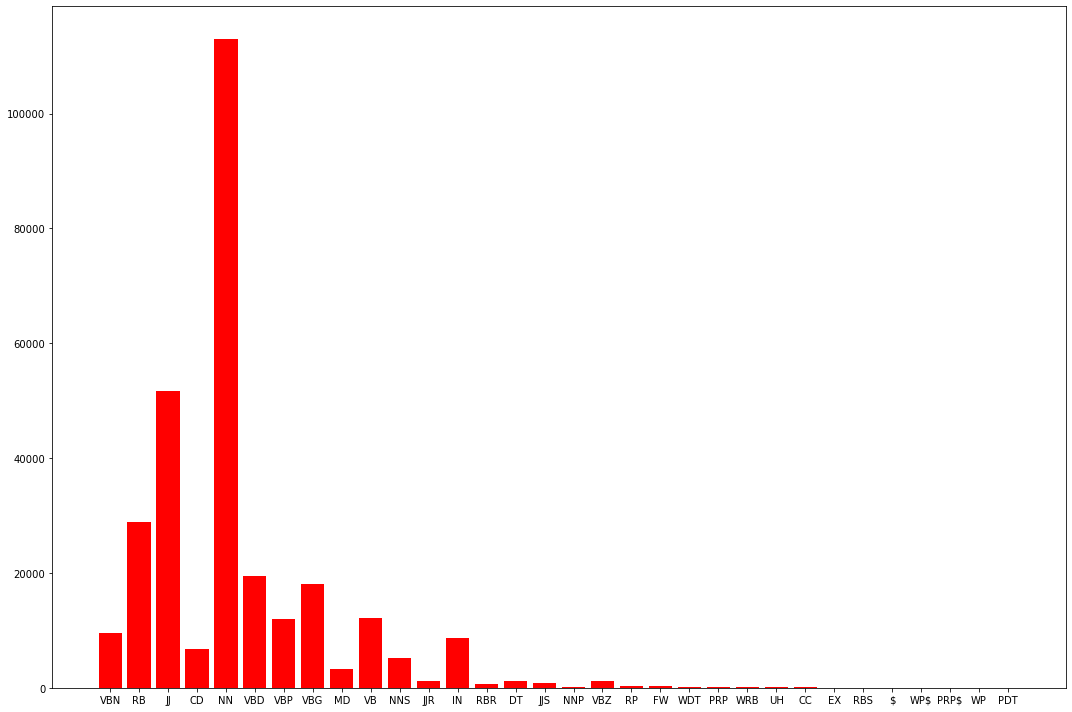

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist


df = pd.read_csv('r-ptsd data.csv')

###tokenize title and body texts###

tokenizer = RegexpTokenizer(r'\w+')
df['title'] = df['title'].apply(lambda x: tokenizer.tokenize(x.lower()))
#had to add in .astype(str) because it would run into some float types and the .lower() will return an error
df['body'] = df['body'].astype(str).apply(lambda x: tokenizer.tokenize(x.lower()))


###remove stopwords###

#returns all words that aren't in the list of stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words
#had to use 'python -m nltk.downloader stopwords' from the TestEnv to make stopwords work
df['title'] = df['title'].apply(lambda x: remove_stopwords(x))
df['body'] = df['body'].apply(lambda x: remove_stopwords(x))


###lemmatizer -- lemmatizer maps common words back to its base###

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(x) for x in text]
    return lem_text
df['title'] = df['title'].apply(lambda x: word_lemmatizer(x))
df['body'] = df['body'].apply(lambda x: word_lemmatizer(x))


###storing title and body columns as a list to feed into pos_tag###
title_list = list(df['title'])
body_list = list(df['body'])


#Text classification: pos tagging
pos_tagged_title = []
pos_tagged_body = []
for ele in title_list:
    pos_tagged_title.append(nltk.pos_tag(ele))
for ele in body_list:
    pos_tagged_body.append(nltk.pos_tag(ele))
    
df['pos_tagged_title'] = pos_tagged_title
df['pos_tagged_body'] = pos_tagged_body



###The codes below analyzes text frequency distribution, collocation, and concordance while excluding certain words###
single_w = []
exclude_list = ['www', 'http', 'reddit', 'com', 'youtube', 'amazon', 'myptsd', 'discord']
for item in df['pos_tagged_title']:
    for tuples in item:
        if tuples[0] not in exclude_list:
            single_w.append(tuples[0])
            
for item in df['pos_tagged_body']:
    for tuples in item:
        if tuples[0] not in exclude_list:
            single_w.append(tuples[0])
            
fd = nltk.FreqDist(single_w)
print(fd.most_common(20))


text = nltk.Text(single_w)
concordance_list = text.concordance_list("want", lines=20)
for entry in concordance_list:
    print(entry.line)
finder = nltk.collocations.QuadgramCollocationFinder.from_words(text)
print(finder)
print(finder.ngram_fd.most_common(20))


'''creating a dictionary to store counts of unique POS tags'''
pos_list = []
for row in df['pos_tagged_body']:
    for tup in row:
        if tup[1] not in pos_list:
            pos_list.append(tup[1])
            
for row in df['pos_tagged_title']:
    for tup in row:
        if tup[1] not in pos_list:
            pos_list.append(tup[1])
            
pos_dict = {}
for item in pos_list:
    pos_dict[item] = 0
    for row in df['pos_tagged_body']:
        for tup in row:
            if tup[1] == item:
                pos_dict[item] += 1
    
    for row in df['pos_tagged_title']:
        for tup in row:
            if tup[1] == item:
                pos_dict[item] += 1
                

'''Plotting the counts'''
%matplotlib inline

fig = plt.figure(figsize=(15,10))
plt.bar(pos_dict.keys(), pos_dict.values(), color='red')
plt.tight_layout()
plt.savefig("pos_dist.png", dpi=300)
plt.show()


###getting headers###
key_list = []
for key in df.keys():
    key_list.append(key)


df.to_csv('r-ptsd data cleaned.csv', index=False, header=key_list)